In [12]:
#import libraries for house price prediction
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_california_housing

In [13]:
# Load the dataset
california_housing = fetch_california_housing()
df = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)
df['PRICE'] = california_housing.target

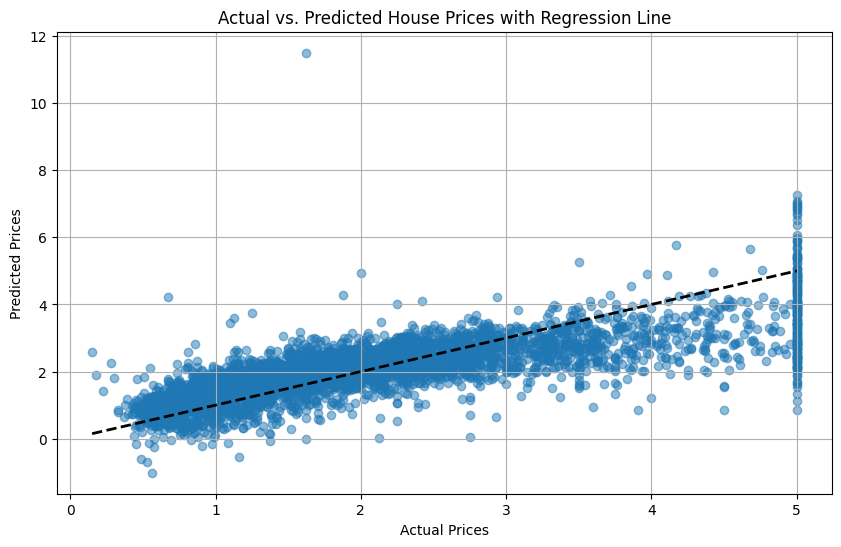

In [18]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted House Prices with Regression Line")
plt.grid(True)

# Add the regression line
# The line is y = x, as perfect predictions would lie on this line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)

plt.show()

Now, let's perform some basic data cleaning and preparation steps.

In [14]:
# Check for missing values
print("Missing values before cleaning:")
print(df.isnull().sum())

# For this example, we'll keep it simple and just remove rows with missing values if any exist.
# In a real-world scenario, you might use imputation or other techniques.
df.dropna(inplace=True)

print("\nMissing values after cleaning:")
print(df.isnull().sum())

Missing values before cleaning:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64

Missing values after cleaning:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
PRICE         0
dtype: int64


Next, we'll prepare the data for the linear regression model. We'll split the data into features (X) and target (y).

In [15]:
from sklearn.model_selection import train_test_split

X = df.drop('PRICE', axis=1)
y = df['PRICE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (16512, 8)
Testing data shape: (4128, 8)


Finally, let's build and train a simple linear regression model.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nMean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

# Display the first few predictions
print("\nFirst 5 predictions vs actual values:")
for i in range(5):
    print(f"Predicted: {y_pred[i]:.2f}, Actual: {y_test.iloc[i]:.2f}")


Mean Squared Error: 0.56
R-squared: 0.58

First 5 predictions vs actual values:
Predicted: 0.72, Actual: 0.48
Predicted: 1.76, Actual: 0.46
Predicted: 2.71, Actual: 5.00
Predicted: 2.84, Actual: 2.19
Predicted: 2.60, Actual: 2.78
